In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('D:/210968186/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
# Dropping identification columns
df = df.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
df = df.replace(to_replace={'male':1,'female':-1,'Q':3,'S':2,'C':1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,-1,38.0,1,0,71.2833,1
2,1,3,-1,26.0,0,0,7.9250,2
3,1,1,-1,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,-1,39.0,0,5,29.1250,3
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,-1,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,1


In [9]:
df.corr()['Survived']

Survived    1.000000
Pclass     -0.356462
Sex        -0.536762
Age        -0.082446
SibSp      -0.015523
Parch       0.095265
Fare        0.266100
Embarked   -0.189657
Name: Survived, dtype: float64

In [10]:
independent = abs(df.corr()['Survived'][1:]).sort_values(ascending=False).head(3).index.to_list()
independent

['Sex', 'Pclass', 'Fare']

In [11]:
df = df/df.max()
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.000000,1.0,0.2750,0.2,0.000000,0.014151,0.666667
1,1.0,0.333333,-1.0,0.4750,0.2,0.000000,0.139136,0.333333
2,1.0,1.000000,-1.0,0.3250,0.0,0.000000,0.015469,0.666667
3,1.0,0.333333,-1.0,0.4375,0.2,0.000000,0.103644,0.666667
4,0.0,1.000000,1.0,0.4375,0.0,0.000000,0.015713,0.666667
...,...,...,...,...,...,...,...,...
885,0.0,1.000000,-1.0,0.4875,0.0,0.833333,0.056848,1.000000
886,0.0,0.666667,1.0,0.3375,0.0,0.000000,0.025374,0.666667
887,1.0,0.333333,-1.0,0.2375,0.0,0.000000,0.058556,0.666667
889,1.0,0.333333,1.0,0.3250,0.0,0.000000,0.058556,0.333333


In [12]:
print("Mean:",df['Fare'].mean(),"Std:",df['Fare'].std())
df['Fare'].loc[np.logical_or(df['Fare'] < df['Fare'].mean() - 2*df['Fare'].std(),df['Fare'] > df['Fare'].mean() + 2*df['Fare'].std())] = df['Fare'].median()
print("Mean:",df['Fare'].mean(),"Std:",df['Fare'].std())

Mean: 0.06747078129549205 Std: 0.10332935966700878
Mean: 0.05036005115285469 Std: 0.05068943340619656


In [13]:
print("Mean:",df['Age'].mean(),"Std:",df['Age'].std())
df['Age'].loc[np.logical_or(df['Age'] < df['Age'].mean() - 2*df['Age'].std(),df['Age'] > df['Age'].mean() + 2*df['Age'].std())] = df['Age'].median()
print("Mean:",df['Age'].mean(),"Std:",df['Age'].std())

Mean: 0.37052615870786515 Std: 0.18116166125404387
Mean: 0.35358584971910095 Std: 0.15775520097952794


In [14]:
from sklearn.model_selection import train_test_split

Y = df['Survived']
X = df[independent]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [30]:
theta = [0.5,0.5,0.5]
def hypothesis(theta, X):
    return theta*X
def Cost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*len(X))
def gradientDescent(X, y, theta, alpha, epoch):
    costs = []  
    k = 0
    while k < epoch:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        cost = Cost(X, y, theta)
        costs.append(cost)
        k += 1
    return costs, cost, theta
cost , c , theta = gradientDescent(X_train,y_train,theta,0.00008,60000)
c

0.18809158000324477

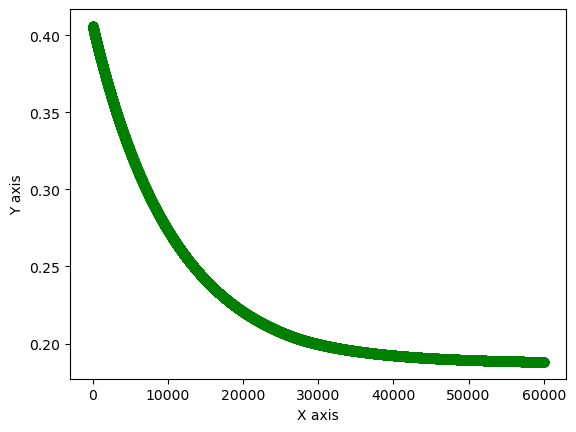

In [31]:
import matplotlib.pyplot as plt

plt.scatter(x=list(range(len(cost))), y = cost, color='green')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()
y_new = hypothesis(theta, X_test)
y_new = np.sum(y_new, axis=1)

In [32]:
def norm(x):
    nom = (x - x.min()) * 2.0
    denom = x.max() - x.min()
    return  nom/denom - 1.0

def sigmoid(x, k=0.1):
    s = 1 / (1 + np.exp(-x / k)) 
    return s

    
y_new = norm(y_new)
y_new = sigmoid(y_new)

val = []

for data in y_new:
    if data < 0.5:
        val.append(0)
    else:
        val.append(1)
y_new = pd.Series(val)
y_new

0      1
1      0
2      0
3      0
4      0
      ..
173    0
174    1
175    1
176    1
177    0
Length: 178, dtype: int64

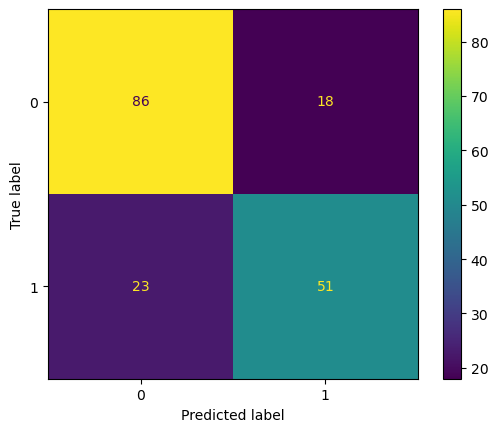

In [33]:
from sklearn import metrics

matrix = metrics.confusion_matrix(y_test, y_new)
metrics.ConfusionMatrixDisplay(matrix).plot()

In [34]:
print("accuracy score:",metrics.accuracy_score(y_test,y_new)*100)

accuracy score: 76.96629213483146


In [35]:
theta

[-0.2505711809210965, 0.4500791390251722, 0.5645924089659122]